# Проект Планирование кампании на 2017 год интернет-магазина "Стримчик"

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**Описание возрастной категории в соответствии с рейтингом орагнизации ESRB**:
- `EC` - для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует;
- `E` - подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика;
- `E 10+` - подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей;
- `T` - подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия;
- `M` - подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков;
- `AO` - подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности;
- `RP` - категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB

**Для проведения исследования выполним следующие действия**:
- проанализируем данные с помощью стандартных методов;
- проведем предобработку данных (посмотрим типы данных, и при необходимости приведем их к соответствующим, проверим наличие явных и неявных дубликатов, при необходимости обработаем их, проверим на наличе пропусков в данных и там где это логически возможно заполним);
- проведем исследовательский анализ данных (определим актуальный для решения задачи период, определим наиболее популярные платформы, посмотрим влияют ли оценки пользователей и критиков на глобальные продажи);
- проведем статистический анализ данных на основе формулирования и подтверждения/опровержения нулевой и альтернативной гипотез.

Импортируем необходимые для предобработки, исследовательского и статистического анализа библиотеки

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
from math import factorial, sqrt
from scipy.stats import binom, norm

#### Шаг 1. Загрузка данных

In [2]:
data = pd.read_csv('C:/Users/hk/Desktop/практика/датасеты/games.csv')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмортим общую информацию о данных с помощью метода info()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим на статистические данные, которые дают представление о распределении значений в числовых столбцах методом describe()

In [4]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Посмотрим за какой период у нас имеются данные

In [5]:
data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

В исходном наборе данных 16715 строк и 11 столбцов. Данные представлены за период с 1982 по 2016 год.

Определны пропуски в столбцах `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`. Также определена необходимость замены типов данных в столбце `Year_of_Release` на int, в столбце `User_Score` на float, в столбце `Critic_Score` на int. Заметно, что значения с продажами в различных регионах содержат много нулевых значений, так как практически во всех столбцах 25% и 50% квартили равны нулю или очень малы.

#### Шаг 2. Предобработка данных

##### Преобразование названий столбцов

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
data.columns = data.columns.str.lower() 

In [8]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##### Обработка пропусков

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих строках почти нет никакой сущесвтенной информации, и данных о продажах тоже почти нулевые, поэтому удалим эти строки из датафрейма

In [12]:
data = data.dropna(subset=['name']).reset_index(drop=True)

In [13]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [14]:
(data['year_of_release'].isna().sum()) / len(data)

0.016095255190570215

Пропусков в столбце `year_of_release` 269 строк, что составляет 1,6% процент от всех данных, поэтому их можем удалить, так как логичного способа заменить год релиза нет

In [15]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [16]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Посмотрим на значения в столбце `User_Score` 

In [17]:
data[data['user_score'].notna()]['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0'], dtype=object)

Загуглив аббревиатуру 'tbd' понимаем, что она означает - 'to be determined', то есть будет определено. Получается что это тоже пропуск в данных, заменим его на NaN

In [18]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [19]:
data[data['user_score'].notna()]['user_score'].sort_values(ascending=False).unique()

array(['9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9', '8.8',
       '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9', '7.8',
       '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9', '6.8',
       '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9', '5.8',
       '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9', '4.8',
       '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9', '3.8',
       '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9', '2.8',
       '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9', '1.8',
       '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9', '0.7',
       '0.6', '0.5', '0.3', '0.2', '0'], dtype=object)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [21]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим прпопуски в столбце `rating` на ND - not defined, то есть не определен

In [22]:
data['rating'] = data['rating'].fillna(value='ND')

In [23]:
data['rating'].unique()

array(['E', 'ND', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пропуски в столбцах с рейтингами критиков  `critic_score` и пользователей `user_score` удалять не будем, так как они занимают приличный объем датафрейма. Логичной замены (например медианным значеним или средним) подобрать для них тоже не представляется возможным, поэтому оставим пропуски в этих столбцах как есть, чтобы не исказить сильно данные.

##### Замена типов данных

Преобразуем данные в столбце с годом выпуска с вещественного к целочисленному, так как ГОД не может быть с плавающей точкой

In [24]:
data['year_of_release'] = data['year_of_release'].astype(int)

Преобразуем данные `user_score` из типа данных object к вещесвтенному float, так как это вещественные числа, а не строковые значения

In [25]:
data['user_score'] = data['user_score'].astype(float)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


##### Обработка дубликатов

In [27]:
data.duplicated().sum() #проверяем наличие явных дубликатов

0

Явных дубликатов в датафрейме не обнаружено. Проверим на наличие неявных дубликатов по столбцам: `name`, `platform`, `year_of_release` 

In [28]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [29]:
#посмотрим что это за 1 дубликат
data[data.duplicated(subset=['name', 'platform', 'year_of_release']) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [30]:
data[data['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
503,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3933,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5800,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
6956,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Обнаружили, что игра Madden NFL 13 выпущенная на PS3 в 2012 году дублируется два раза, причем в первом случае в датафрейме присутствуют нормальные данные о ее продажах в различных регионах, а во втором случае все продажи практически равны нулю, за исключением минимальных данных в Европе. Будем считать это дубликатом и исключим эту строку из датафрейма

In [31]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

In [32]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

Таким образом, избавились от неявных дубликатов в датафрейме.

##### Подсчет суммарных продаж

In [33]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,ND,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,ND,31.38


##### Дополнительная проверка данных

In [34]:
data.query(
    'year_of_release == 2005 or year_of_release == 2006 or year_of_release == 2007 or year_of_release == 2008').sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2991,Blazing Angels: Squadrons of WWII,PS3,2006,Simulation,0.35,0.22,0.0,0.10,67.0,6.9,T,0.67
7657,Barbie Fashion Show: An Eye for Style,DS,2008,Misc,0.18,0.00,0.0,0.01,NaN,NaN,ND,0.19
9196,Nitrobike,Wii,2008,Racing,0.11,0.01,0.0,0.01,49.0,7.1,E10+,0.13
1343,Tiger Woods PGA Tour 09 All-Play,Wii,2008,Sports,0.80,0.47,0.0,0.14,81.0,8.7,E,1.41
14925,SimCity Societies,PC,2007,Simulation,0.00,0.02,0.0,0.00,63.0,4.3,E10+,0.02


**Вывод по предобработке данных**

На этапе предобработки данных было выполнено следующее:
- преобразование названий столбцов к нижнему регистру;
- обработка явных и невных дубликатов;
- обработка пропусков в столбцах `name`, `year_of_release`, `rating`. 
  
  1) Так как пропусков в столбце `name` всего 2 и информативность этих строк минимальна, было принято решение удалить эти строки из датафрейма;
  
  2) Пропусков в столбце `year_of_release` 1,6% от всех данных в датафрейме, и так как заменить пропуски в годах логичных способом не представляется возможным, так же принято решение удалить эти строки из датафрейма;
  
  3) Пропуски в столбце `rating` принято заменить категориальным значением ND - not defined (не определено), так как заменить на какой-то конкретный рэйтинг игру невозможно, так как в этом столбце представлены категориальные значения. 

- в столбце `user_score` обнаружена аббревиатура 'tbd', означающая to be determined (будет определена), таким образом это такой же пропуск в значениях, но с которым не возможно выполнять какие-либо действия в дальнейшем, поэтому для упрощения дальнейших исследований принято решение строки, где встречается такая аббревиатура заменить на NaN.
- пропуски в столбцах с рейтингами критиков  `critic_score` и пользователей `user_score` удалять не будем, так как они занимают приличный объем датафрейма. Логичной замены (например медианным значеним или средним) подобрать для них тоже не представляется возможным, поэтому оставим пропуски в этих столбцах как есть, чтобы не исказить сильно данные.

Пропуски в данных могут быть обусловлены неправильной работой парсера, с помощью которого данные были получены исходные данные из открытых источников. Так же из данных видно, что для игр, выпущенных в более раннее время практически отсутствуют оценки критиков и пользователей, поэтому есть предположение что сайт начал свою работу позже (где-то с 2000-го года), и данные по "старым" играм не обновлялись.

In [35]:
# Посмотрим, что получилось после предобработки данных
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name :

#### Шаг 3. Проведение исследовательского анализа данных

##### Выпуск и продажи игр в разные годы

Сгруппируем данные об играх по году выпуска

In [36]:
data_year = data.groupby('year_of_release')['name'].count()

Сгруппируем данные об общих продажах

In [37]:
data_sale = data.groupby('year_of_release')['total_sales'].sum()

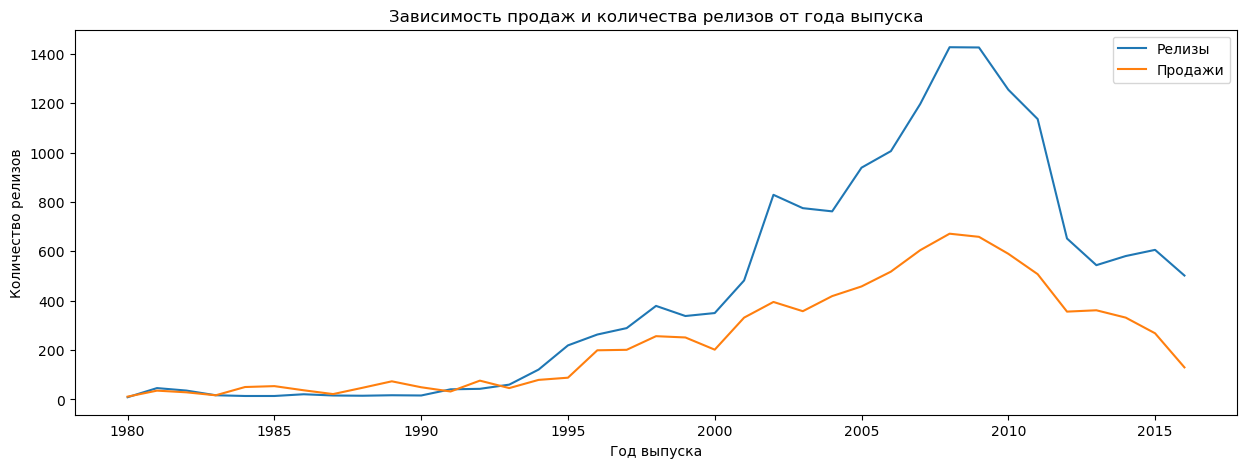

In [38]:
plt.figure(figsize=(15,5))
plt.plot(data_year, label='Релизы')
plt.plot(data_sale, label='Продажи')
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.title('Зависимость продаж и количества релизов от года выпуска')
plt.show()

Из полученного графика видно, что примерно с 1995 года релизы новых платформ и продажи начали расти, соответственно скорее всего интерисующий нас период лежит с 1995 года. Посмотрим на Топ-10 годов, в которых были выпущены новые платформы и на 15 "отстающих"

In [39]:
data_year = data.groupby('year_of_release')['name'].count().sort_values(ascending=False)
data_year.head(10)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: name, dtype: int64

In [40]:
data_year = data.groupby('year_of_release')['name'].count().sort_values(ascending=False)

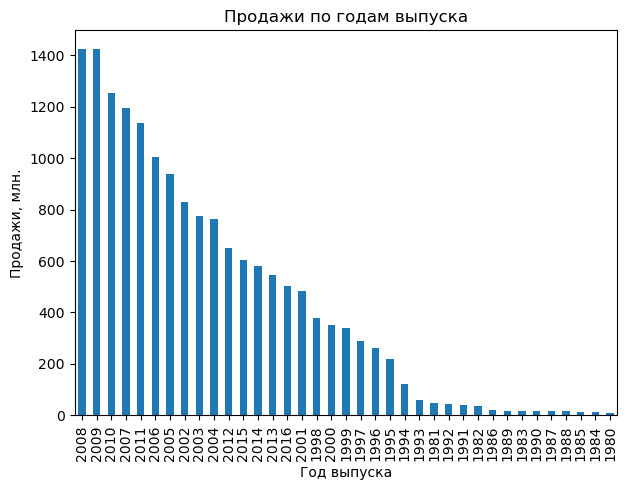

In [41]:
data_year.plot(kind='bar', figsize=(7, 5));
plt.xlabel('Год выпуска')
plt.ylabel('Продажи, млн.')
plt.title('Продажи по годам выпуска')
plt.show()

Заметен приличный скачок по релизам в 1994 году (в 2 раза), и в силу того, что прошло более 20 лет, а данных о продажах до 1994 не более 100 по каждому предшествующему году, будем счиать эти данные устаревшими и исключим их перед дальнейшими исследованиями.
Также следует учитывать, что нам необходимо сделать прогноз на 2017 год, а судя по графику спады начинаются уже в районе 2010 года и брать данные "старее" 10 лет нецелесообразно.
С учетом этого в дальнейших исследованиях будет учитывать данные с 1997 года.

In [42]:
data_new = data[data['year_of_release'] >= 1997]
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15475 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15475 non-null  object 
 1   platform         15475 non-null  object 
 2   year_of_release  15475 non-null  int32  
 3   genre            15475 non-null  object 
 4   na_sales         15475 non-null  float64
 5   eu_sales         15475 non-null  float64
 6   jp_sales         15475 non-null  float64
 7   other_sales      15475 non-null  float64
 8   critic_score     7970 non-null   float64
 9   user_score       7450 non-null   float64
 10  rating           15475 non-null  object 
 11  total_sales      15475 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


##### Продажи и релизы по платформам

Визуализируем Топ платформ по продажам более наглядно с использования графика типа "бар".

In [43]:
platforms_top = (data.groupby('platform', as_index=False)['total_sales'].sum()).sort_values('total_sales', ascending=False)

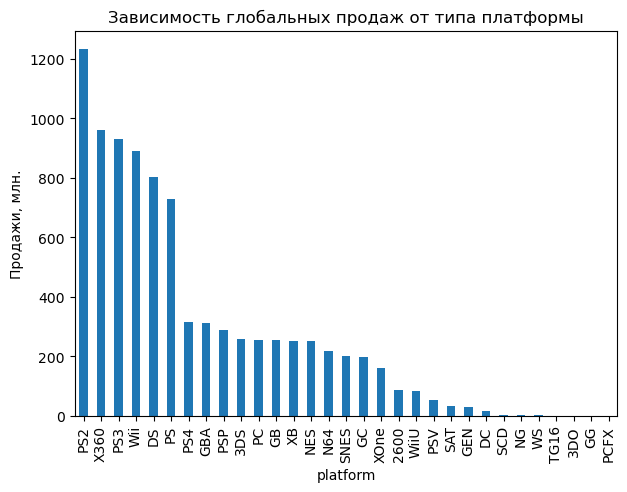

In [44]:
platforms_top.plot(kind='bar', x='platform', figsize=(7, 5), legend=False)
plt.ylabel('Продажи, млн.')
plt.title('Зависимость глобальных продаж от типа платформы')
plt.show()

Из полученного графика видно, что такие платформы как: PS2, X360, PS3, Wii, PS и DS сильно лидируют по продажам, поэтому распределение по годам построим только для этих платформ.

In [45]:
top_6_alltime = platforms_top['platform'].head(6).tolist()
top_6_alltime

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

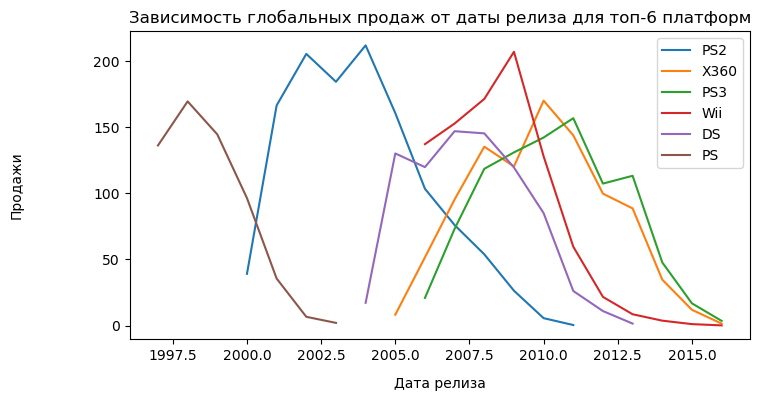

In [46]:
for name in top_6_alltime:
    data_new.query('platform == @name').pivot_table(index='year_of_release',
            values='total_sales', aggfunc='sum').sort_values('year_of_release',
                                                             ascending=False)['total_sales'].plot(figsize = (8, 4), label=name)
    
   
plt.xlabel('Дата релиза', labelpad = 10)
plt.ylabel('Продажи', labelpad = 50)
plt.title('Зависимость глобальных продаж от даты релиза для топ-6 платформ')
plt.legend()
plt.show()

По полученному графику видно, что любая платформа появлется и исчезает примерно в течение 10 лет. Так как нам нужно составить прогноз на следующий 2017 год, необходимо учитывать данные о только появляющих платформах или находящих на пике популярности, чтобы к 2017 году такие платформы не сошли на нет.


In [47]:
#Определим "срок" жизни платформы
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [48]:
data_actual = data_new.query('year_of_release >= 2012')
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,ND,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,ND,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,ND,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,ND,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,ND,0.01


Таким образом, анализируя разными способами данные мы получили, что:
- данных до 1994 года совсем мало (меньше 100 значений), поэтому принято решение их отбросить, так как эти данные совсем не актуальные и не несут никакой информативной нагрузки;
- данные в период с 1994 по 2016 год двольно информативны, но в них получена закономерность, что в районе 2010-го продажи начинают спадать (что может быть обусловлено возрастающей популярностью игр на мобильных устройствах), а так как нас интерисует прогноз на 2017 год, исследовать данные старее чем на 10  лет интересуюещго срока не представляется целесообразным;
- "жизненный цикл" платформ от появления до исчезновения составляет примерно 10 лет с пиком популярности в районе 4-5 лет, поэтому еще отсечем данне о годах "старше" 2012 года.

Итого: в дальнейших исследованиях испольуем данные с 2012 по 2016 года

##### Выбор потенциально прибыльных платформ

In [49]:
data_actual_platform = data_actual.groupby(['platform'], 
                                           as_index=False)['total_sales'].sum().sort_values('total_sales', ascending=False)
data_actual_platform                   

,platform,total_sales
4,PS4,314.14
3,PS3,288.78
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


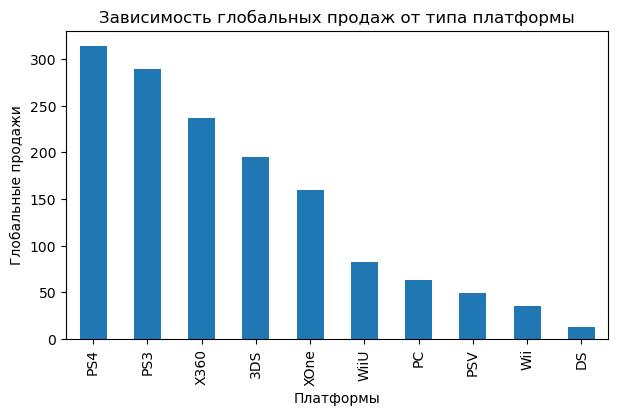

In [50]:
data_actual_platform.head(10).plot(kind='bar', x='platform', y='total_sales', figsize=(7, 4), legend=False);
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи')
plt.title('Зависимость глобальных продаж от типа платформы')
plt.show()

In [51]:
top_now = data_actual_platform['platform'].head(10).tolist()
top_now

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']

##### Продажи игр в разные годы

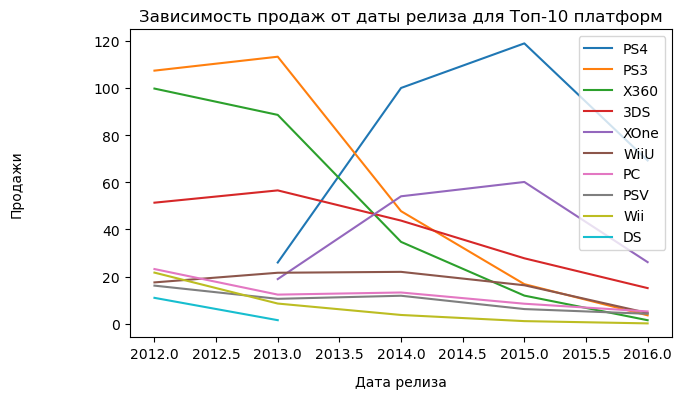

In [52]:
for name in top_now:
    data_actual.query('platform == @name').pivot_table(index='year_of_release',
            values='total_sales', aggfunc='sum').sort_values('year_of_release',
                                                             ascending=False)['total_sales'].plot(figsize = (7, 4), label=name);
    
   
plt.xlabel('Дата релиза', labelpad = 10)
plt.ylabel('Продажи', labelpad = 50)
plt.title('Зависимость продаж от даты релиза для Топ-10 платформ')
plt.legend()
plt.show()

Как видно из полученных графиков, что продажи всех платформ со вврменем падают, однако наиболее прибыльными показали себя платформы PS4 и XOne

In [53]:
promising_platforms = data_actual.query('platform == "PS4" or platform == "XOne"')
promising_platforms_stats = (promising_platforms.groupby(['platform','year_of_release'],as_index = False)['total_sales'].sum()
                                 .sort_values('platform',ascending = False)
                           )
promising_platforms_stats

,platform,year_of_release,total_sales
4,XOne,2013,18.96
5,XOne,2014,54.07
6,XOne,2015,60.14
7,XOne,2016,26.15
0,PS4,2013,25.99
1,PS4,2014,100.00
2,PS4,2015,118.90
3,PS4,2016,69.25


Таким образом получаем, что наиболее потенциально прибыльными платформами являются **PS4** и **XOne**, поэтому в дальнейших исследованиях будем анализировать только их.

##### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

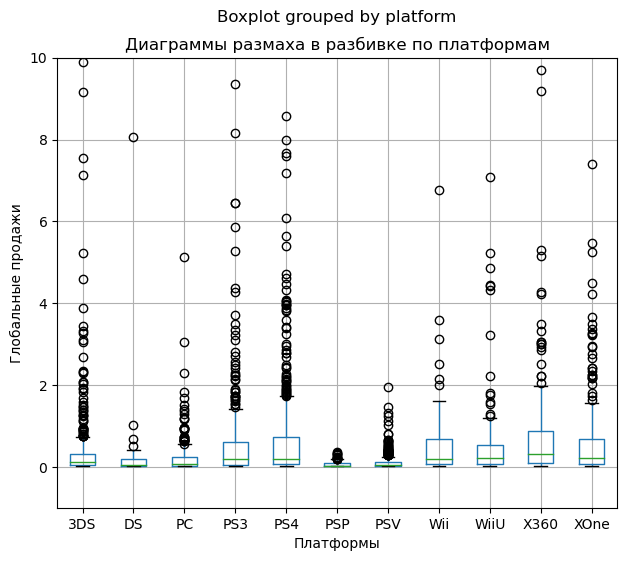

In [54]:
data_actual.boxplot(by='platform', column='total_sales', figsize=(7, 6));
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи')
plt.ylim(-1, 10)
plt.title('Диаграммы размаха в разбивке по платформам')
plt.show()

Построим более масштабированные диаграммы размаха в разбивке по платформам

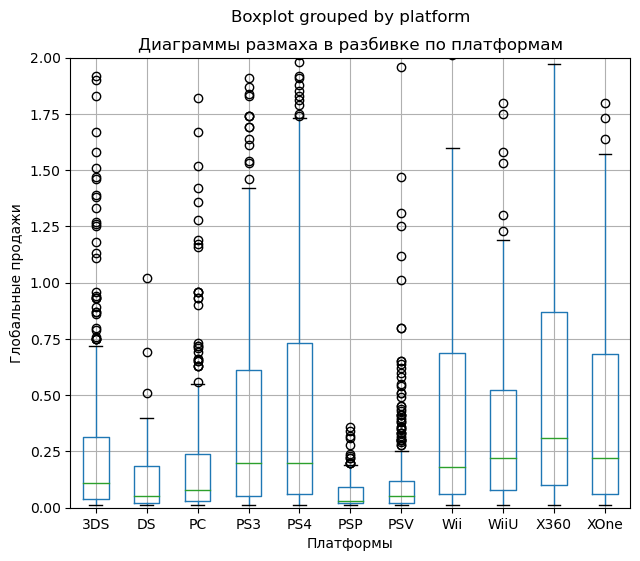

In [55]:
data_actual.boxplot(by='platform', column='total_sales', figsize=(7, 6));
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи')
plt.ylim(0, 2)
plt.title('Диаграммы размаха в разбивке по платформам')
plt.show()

In [56]:
data_actual_mean_median = (data_actual.pivot_table(index = 'platform'
                                                                 ,values='total_sales'
                                                                 ,aggfunc = ['mean','median']))
data_actual_mean_median.columns = ['mean_total_sales', 'median_total_sales']
data_actual_mean_median.sort_values(by='median_total_sales', ascending=False)

,mean_total_sales,median_total_sales
platform,,
X360,0.810068,0.31
WiiU,0.559116,0.22
XOne,0.645020,0.22
PS4,0.801378,0.20
PS3,0.586951,0.20
Wii,0.655000,0.18
3DS,0.491439,0.11
PC,0.250600,0.08
DS,0.404839,0.05


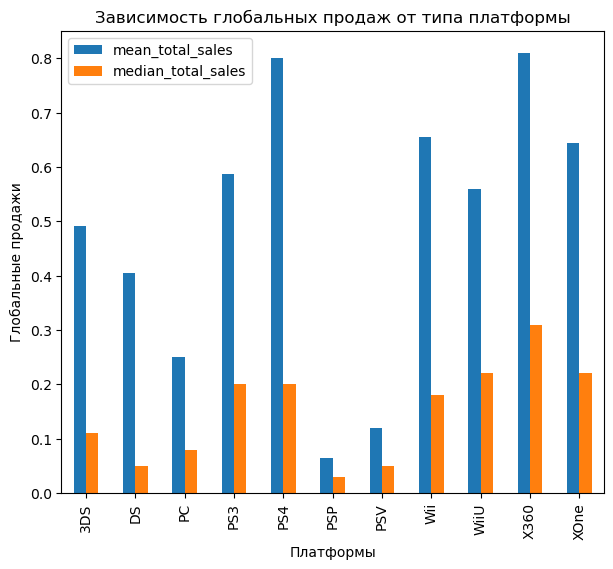

In [57]:
data_actual_mean_median.plot(kind='bar', figsize=(7, 6), legend=True);
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи')
plt.title('Зависимость глобальных продаж от типа платформы')
plt.show()

По результатам построения диаграммы рассеяния и подсчета среднего и медианного значения, можно сказать, что одна платформа в среднем приносит около одного миллиона, однако по существенно меньшему медианному значению и "выбросам" на диаграмме рассеяния, можно однозначно сказать, что на многих платформах из топа-10 выпускались какие-то очень популярные игры, приносившие продажи гораздо выше среднего. 
Для всех платформ наблюдаются некоторые выбросы, обусловленные как уже отмечалось выше успешностью продаж отдельно популярных игр, но стабильность высоких продаж можно оценить по медианному значению, здесь наилучшие показатели показывают такие платформы как X360, XOne, PS4, WiiU, Wii

##### Зависимость продаж одной популярной платформы от отзывов критиков и пользователей

Для исследования выберем данные для платформы PS4

In [58]:
ps4 = promising_platforms.query('platform == "PS4"')

In [59]:
#задаем параметры по которым будет построена матрица и диаграмма рассения
estimate = ['user_score', 'critic_score', 'total_sales'] 

Построим матрицу рассеяния зависимости глобальных продаж от оценок пользователей и оценок критиков

In [60]:
matrix_corr_ps4 = ps4[estimate].corr()
display(matrix_corr_ps4)

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
total_sales,-0.031957,0.406568,1.000000


Построим диаграмму рассеяния зависимости глобальных продаж от оценок пользователей

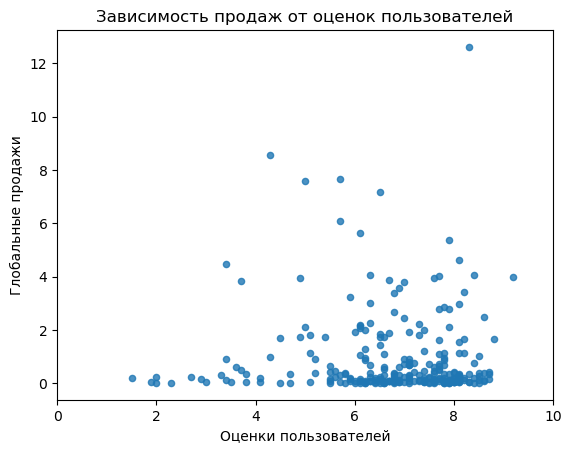

In [61]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.8)
plt.title('Зависимость продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобальные продажи')
plt.xlim(0,10)
plt.show()

Построим диаграмму рассеяния зависимости глобальных продаж от оценок критиков

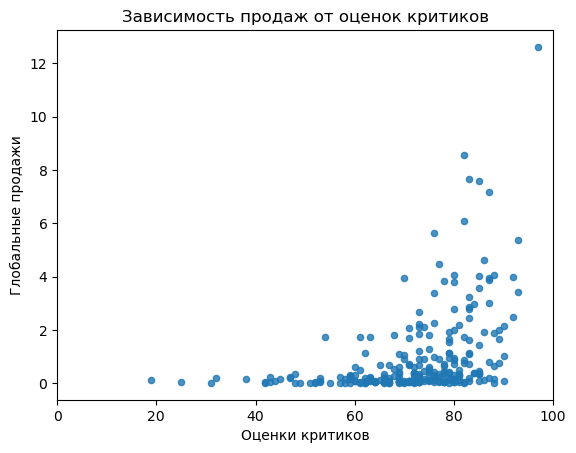

In [62]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.8)
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Глобальные продажи')
plt.xlim(0,100)
plt.show()

- Очевидной взаимосвязи между оценкой пользователей и продажами нет, коэффициент корреляции меньше 0,05
- Прямая взаимосвязь между оценкой критиков и продажами хоть и не очень большая (коэффициент корреляции примерно 0,4), но есть. Это может означать, что для некоторого числа покупателей оценка критиков при выборе игры имеет значение.

Для подвтерждения вывода о том, что оценки критиков и пользователей не сильно влияют на продажи, проведем такое же исследование для платформ X360, XOne, WiiU, Wii, PS3

In [63]:
top_platform_corr = ['X360', 'XOne', 'WiiU', 'PC', 'PS3'] #создаем список интерисующих нас платформ

In [64]:
for top_platform in top_platform_corr:
    display(data_actual.query('platform == @top_platform')[estimate].corr()); #строим матрицы корреляции 
                                                                              #для каждого типа платформ

,user_score,critic_score,total_sales
user_score,1.000000,0.557352,0.006164
critic_score,0.557352,1.000000,0.360573
total_sales,0.006164,0.360573,1.000000


,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.416998
total_sales,-0.068925,0.416998,1.000000


,user_score,critic_score,total_sales
user_score,1.000000,0.77008,0.400219
critic_score,0.770080,1.00000,0.348380
total_sales,0.400219,0.34838,1.000000


,user_score,critic_score,total_sales
user_score,1.000000,0.432587,-0.121867
critic_score,0.432587,1.000000,0.237243
total_sales,-0.121867,0.237243,1.000000


,user_score,critic_score,total_sales
user_score,1.000000,0.544510,-0.006206
critic_score,0.544510,1.000000,0.334152
total_sales,-0.006206,0.334152,1.000000


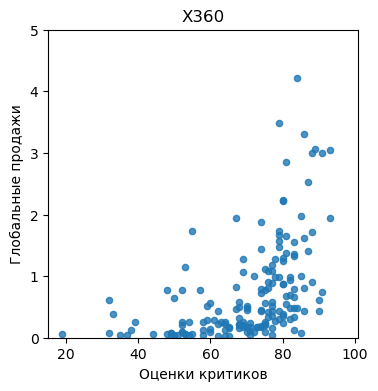

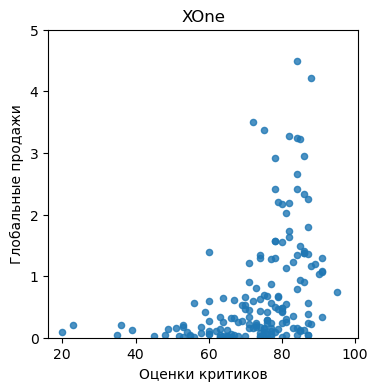

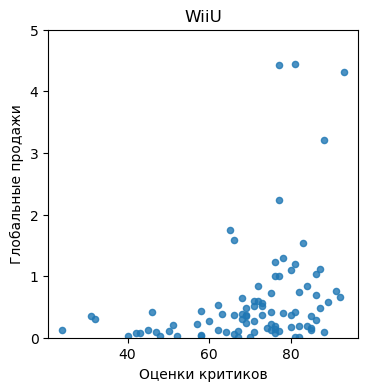

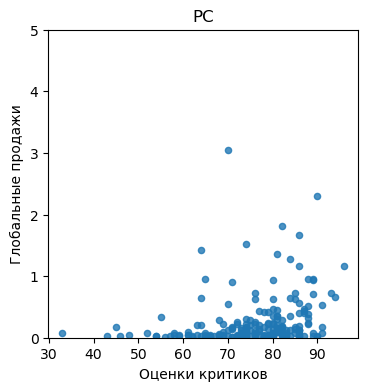

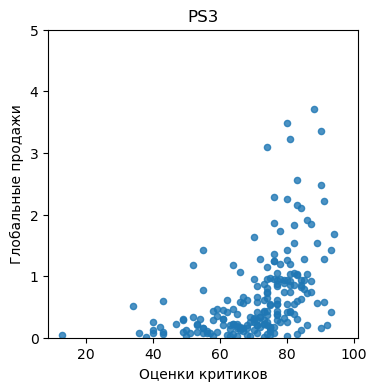

In [65]:
#строим диаграммы рассеяния зависимости глобальных продаж относительно оценок критиков для каждой платформы из списка 
for top_platform in top_platform_corr:
    data_actual.query('platform == @top_platform').plot(x='critic_score',
                                                        y='total_sales',
                                                        kind='scatter',
                                                        alpha=0.8,
                                                        title=top_platform,
                                                       figsize=(4,4));
    plt.ylim(0, 5)
    plt.xlabel('Оценки критиков')
    plt.ylabel('Глобальные продажи')
plt.show()

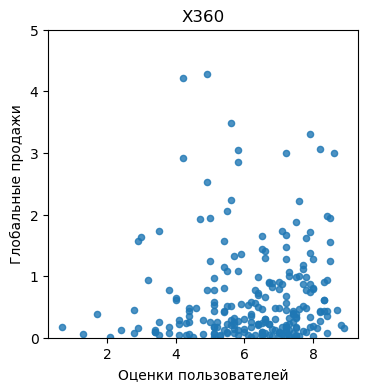

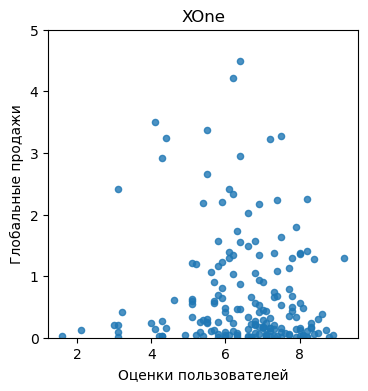

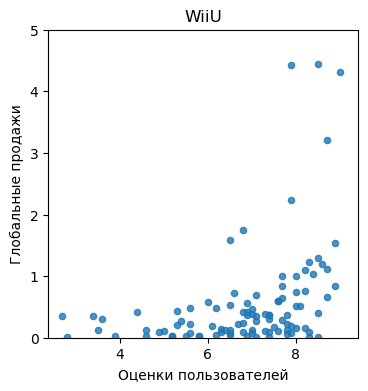

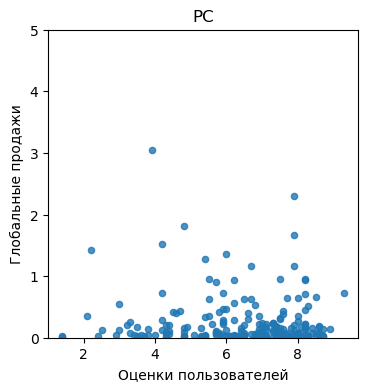

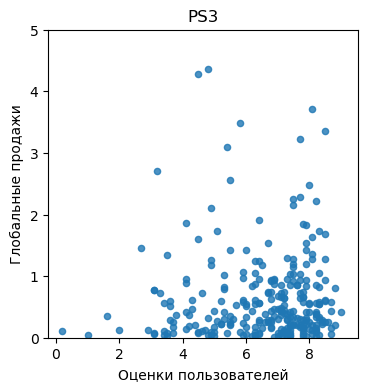

In [66]:
#строим диаграммы рассеяния зависимости глобальных продаж относительно оценок пользователей для каждой платформы из списка 
for top_platform in top_platform_corr:
    data_actual.query('platform == @top_platform').plot(x='user_score',
                                                        y='total_sales',
                                                        kind='scatter',
                                                        alpha=0.8,
                                                        title=top_platform,
                                                       figsize=(4,4));
    plt.ylim(0, 5)
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Глобальные продажи')
    
plt.show()

In [67]:
xone = promising_platforms.query('platform == "XOne"')

In [68]:
matrix_corr_xone = xone[estimate].corr()
display(matrix_corr_xone)

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.416998
total_sales,-0.068925,0.416998,1.000000


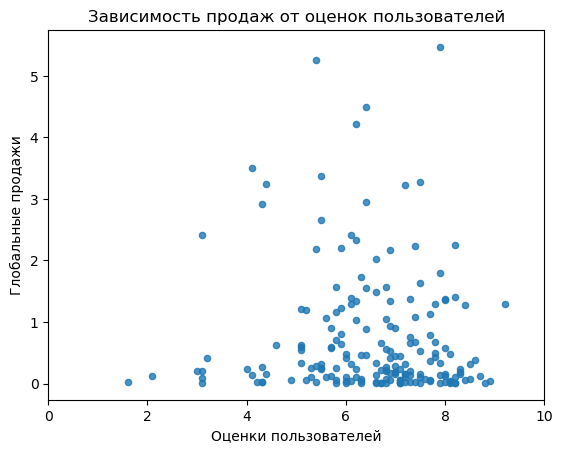

In [69]:
xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.8)
plt.title('Зависимость продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобальные продажи')
plt.xlim(0,10)
plt.show()

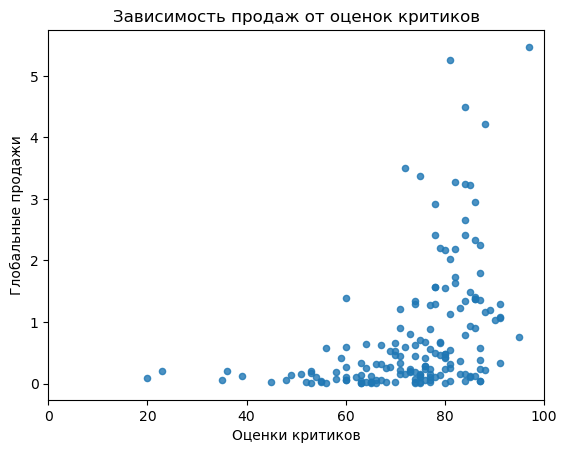

In [70]:
xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.8)
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Глобальные продажи')
plt.xlim(0,100)
plt.show()

Как видно из построенных матриц корреляции и диаграмм рассеняи для разных платформ, оценки пользователей практически не влияют на продажи, а вот высокие оценки критиков в некоторых случаях приводят к увеличению продаж

##### Жанры и продажи

Построим график популярности жанров для выбранных перспективных платформ PS4 и XOne

In [71]:
# Комментарий р
temp1, temp2 = promising_platforms.total_sales.sum(), data_actual.total_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(473.4599999999999, 1446.5200000000002, 67.27)

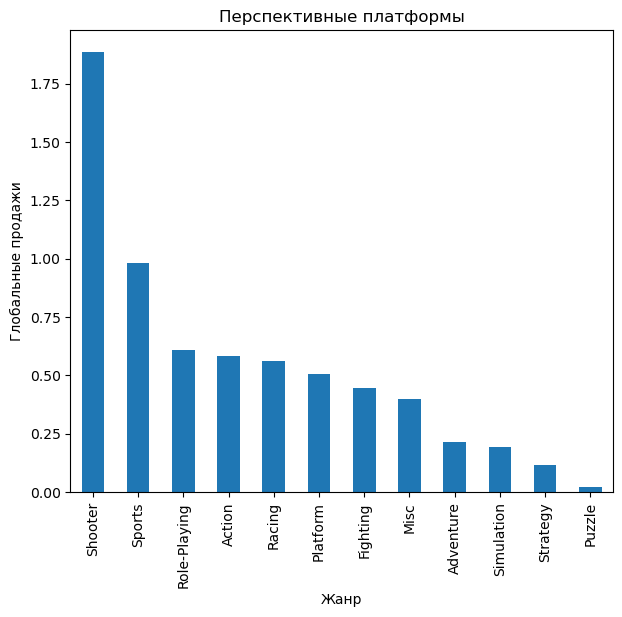

In [72]:
promising_platforms.pivot_table(index='genre',
                                 values='total_sales').sort_values('total_sales',
                                                                   ascending=False).plot(kind='bar',
                                                                                         y='total_sales',
                                                                                         figsize=(7, 6), legend=False,
                                                                                         title = 'Перспективные платформы')
    
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.show()


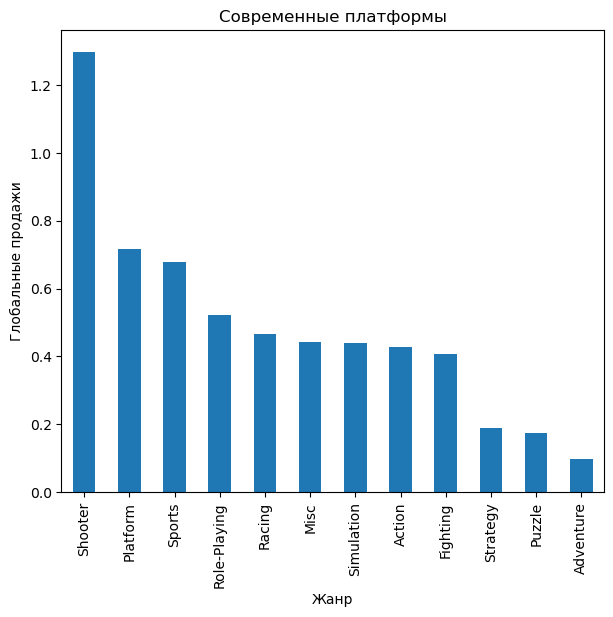

In [73]:
data_actual.pivot_table(index='genre',
                                 values='total_sales').sort_values('total_sales',
                                                                   ascending=False).plot(kind='bar',
                                                                                         y='total_sales',
                                                                                         figsize=(7, 6), legend=False,
                                                                                         title = 'Современные платформы')
    
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.show()

Из полученных графиков видно, что самые популярные жанры это Стрелялки, Спортивные, Платформеры. Наименьшей популярностю пользуются стратегии, квесты, приключения.

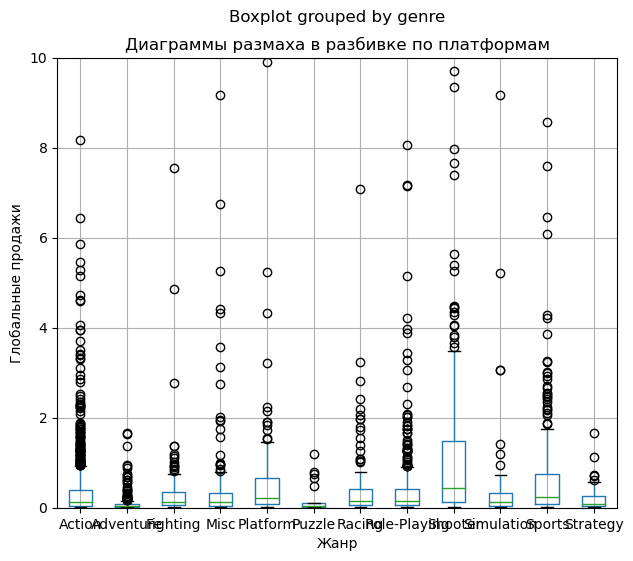

In [74]:
data_actual.boxplot(by='genre', column='total_sales', figsize=(7, 6));
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.ylim(0, 10)
plt.title('Диаграммы размаха в разбивке по платформам')
plt.show()

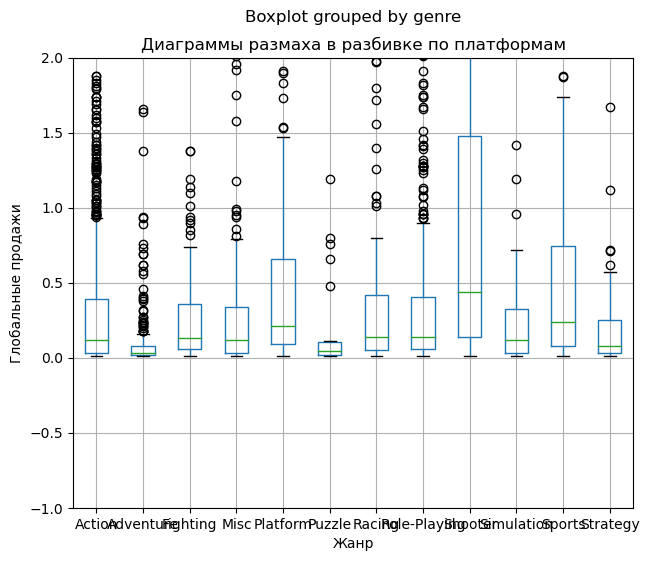

In [75]:
data_actual.boxplot(by='genre', column='total_sales', figsize=(7, 6));
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.ylim(-1, 2)
plt.title('Диаграммы размаха в разбивке по платформам')
plt.show()

In [76]:
data_actual_mean_median_genre = (data_actual.pivot_table(index = 'genre'
                                                                 ,values='total_sales'
                                                                 ,aggfunc = ['mean','median']))
data_actual_mean_median_genre.columns = ['mean_total_sales', 'median_total_sales']
data_actual_mean_median_genre.sort_values(by='median_total_sales', ascending=False)

,mean_total_sales,median_total_sales
genre,,
Shooter,1.296723,0.440
Sports,0.678127,0.240
Platform,0.717647,0.210
Role-Playing,0.521081,0.140
Racing,0.465217,0.140
Fighting,0.408165,0.130
Action,0.427856,0.120
Misc,0.442917,0.120
Simulation,0.439000,0.120


**Вывод по исследовательскому анализу данных**

На этапе проведения исследовательского анализа данных было выполнено следующее:
- Были проанализированы данные о количестве выпускаемых игр за весь представленный в датафрейме период с 1982 по 2016 года. Обнаружено, что до 1994 года игры продавались в минимальном количестве (меньше 100 экземпляров в год), поэтому данные до 1994 года было принято отбросить;
- Были проанализированые данные о продажах по платформам, сформированы Топ-10 платформ, по которым глобальные продажи больше основных;
- По этим же данным получено, что "жизненный цикл" платформ от появления до исчезновения составляет примерно 10 лет, и так как нам необходимо по результатам исследования сделать некий прогноз на 2017 год, то было принято решение брать данные только за предшествующие 2017-му году 5 лет, так как к этому времени некоторые платформы будут либо в начале либо на пике популярности;
- По полученном топу 10 платформ построены графики зависимостей продаж от года, по результатам которых обнаружено, что продажи всех плтаформ, даже самых популярных со временем падают. Наиболее с выгодной стороны показали себя платформы PS4 и XOne, поэтому для дальнешего анализа использовали только эти две платформы.
- Построили для топ-10 плотформ диграммы размаха и получены средние и медианные значения по продажам. Проанализировав полученные данные можно сказать, что в среднем одна игра приносит 1 миллион, однако обратив внимание на гораздо меньшее медианное значение и имеющиеся "разбросы" в диаграмме рассеяния можно довольно точно сказать, что это связано с тем, что на некоторых платформах выпускалась какая-то суперприбыльная игра, которая так сильно "перетянула" среднее значение на себя.
- Так же для обеих ряда платформ были построены матрицы и диаграммы рассения, из которых однозначно можно сказать, что оценки пользователей никак не влияют на глобальные продажи, а вот оценки критиков имеют прямое воздействие, чем больше оценка критиков, тем выше продажи этой игры;
- На основе имеющихся данных также получено что не смотря на платформу и год выпуска, наиболее популярны у пользователей такие жанры игр как: Стрелялки, Спортивные, Гонки. Наименьшей популярностю пользуются стратегрии, квесты, приключения.

#### Шаг 4. Составление портрета каждого региона

Составим список каждого региона 

In [77]:
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']

In [78]:
print(data_actual[regions_sales].sum())

na_sales    590.97
eu_sales    506.81
jp_sales    192.58
dtype: float64


Стоить отметить, что суммырный объем продаж в Японии более чем в 2,5 раза меньше Европы и Америки

##### Самые популярные платформы (топ-5) для каждого региона

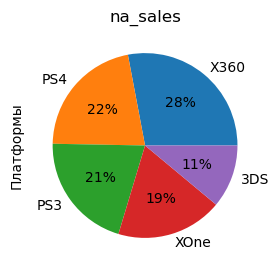

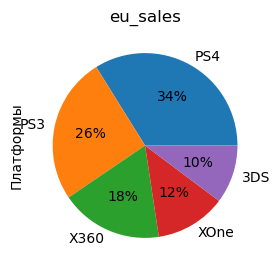

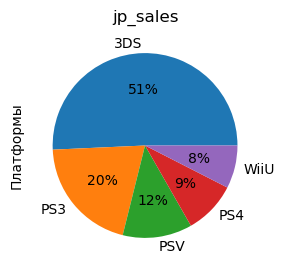

In [79]:
for region in regions_sales:
    (data_actual.pivot_table(index='platform', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(3, 3), legend=False, title = region)
                .set(ylabel='Платформы'))
plt.show()

Посчитаем доли продаж для каждого региона в разбивке по всем платформам, представленных в датасете, а не только по топ-5

In [80]:
na = data_actual.groupby('platform').agg({'na_sales':'sum'}).sort_values(by = 'na_sales', ascending = False)

In [81]:
na['ratio'] = ((na['na_sales']) / (data_actual['na_sales'].sum()))
na.head(10)

,na_sales,ratio
platform,,
X360,140.05,0.236983
PS4,108.74,0.184003
PS3,103.38,0.174933
XOne,93.12,0.157571
3DS,55.31,0.093592
WiiU,38.10,0.064470
PC,19.12,0.032354
Wii,17.45,0.029528
PSV,10.98,0.018580


Получили, что в Америке по продажам лидируют такие плафтормы как X360 (23% от всех продаж), PS4 (18% от всех продаж) и PS3 (17% от всех продаж)

In [82]:
eu = data_actual.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending = False)

In [83]:
eu['ratio'] = ((eu['eu_sales']) / (data_actual['eu_sales'].sum()))
eu.head(10)

,eu_sales,ratio
platform,,
PS4,141.09,0.278388
PS3,106.85,0.210829
X360,74.52,0.147037
XOne,51.59,0.101794
3DS,42.64,0.084134
PC,37.76,0.074505
WiiU,25.13,0.049585
Wii,11.92,0.023520
PSV,11.36,0.022415


Получили, что в Европе по продажам лидируют такие плафтормы как PS4 (27% от всех продаж), PS3 (21% от всех продаж) и X360 (14% от всех продаж)

In [84]:
jp = data_actual.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending = False)

In [85]:
jp['ratio'] = ((jp['jp_sales']) / (data_actual['jp_sales'].sum()))
jp.head(10)

,jp_sales,ratio
platform,,
3DS,87.79,0.455862
PS3,35.29,0.183249
PSV,21.04,0.109253
PS4,15.96,0.082875
WiiU,13.01,0.067556
PSP,10.47,0.054367
DS,3.72,0.019317
Wii,3.39,0.017603
X360,1.57,0.008152


Получили, что в Японии ситуация несколько иная, и лидером по продажам является платформа местного производства 3DS (45% от всех продаж), на втором месте PS3 (18% от всех продаж)

##### Самые популярные жанры (топ-5) для каждого региона

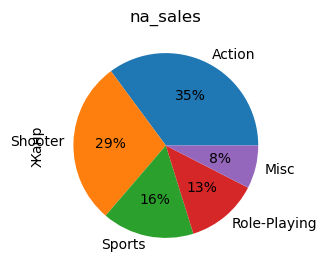

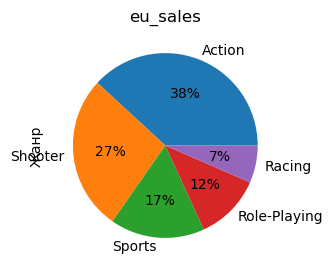

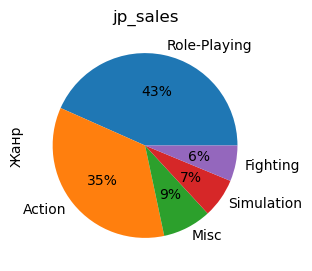

In [86]:
for region in regions_sales:
    (data_actual.pivot_table(index='genre', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(3, 3), legend=False, title = region)
                .set(ylabel='Жанр'))
plt.show()

По полученным круговым диаграммам видно:
- в Америке предпочитают такие жанры, как Shooter (29%) и Action (35%)
- в Европе также предпочитают жанры Shooter (27%) и Action (38%)
- а вот в Японии большее предпочтение отдается жанру Role-Playing (43%) и Action (35%). И в топ-5 вообще нет жанра Shooter

In [87]:
na_genre = data_actual.groupby('genre').agg({'na_sales':'sum'}).sort_values(by = 'na_sales', ascending = False)

In [88]:
na_genre['ratio'] = ((na_genre['na_sales']) / (data_actual['na_sales'].sum()))
na_genre.head(10)

,na_sales,ratio
genre,,
Action,177.84,0.300929
Shooter,144.77,0.244970
Sports,81.53,0.137960
Role-Playing,64.00,0.108297
Misc,38.19,0.064623
Platform,25.38,0.042946
Fighting,19.79,0.033487
Racing,17.22,0.029139
Adventure,8.92,0.015094


Получили, что в Америке по продажам лидируют такие жанры как Action (30% от всех продаж), Shooter (24% от всех продаж) и Sports (13% от всех продаж)

In [89]:
eu_genre = data_actual.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending = False)

In [90]:
eu_genre['ratio'] = ((eu_genre['eu_sales']) / (data_actual['eu_sales'].sum()))
eu_genre.head(10)

,eu_sales,ratio
genre,,
Action,159.34,0.314398
Shooter,113.47,0.223891
Sports,69.08,0.136304
Role-Playing,48.53,0.095756
Racing,27.29,0.053847
Misc,26.32,0.051933
Platform,21.41,0.042245
Simulation,14.55,0.028709
Fighting,10.79,0.021290


Получили, что в Европе по продажам лидируют такие жанры как Action (31% от всех продаж), Shooter (22% от всех продаж) и Sports (13% от всех продаж), что очень схоже с ситуцией в Америке

In [91]:
jp_genre = data_actual.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending = False)

In [92]:
jp_genre['ratio'] = ((jp_genre['jp_sales']) / (data_actual['jp_sales'].sum()))
jp_genre.head(10)

,jp_sales,ratio
genre,,
Role-Playing,65.44,0.339807
Action,52.80,0.274172
Misc,12.86,0.066777
Simulation,10.41,0.054055
Fighting,9.44,0.049019
Shooter,9.23,0.047928
Platform,8.63,0.044813
Adventure,8.24,0.042787
Sports,8.01,0.041593


Получили, что в Японии по продажам лидируют такие жанры как Role-Playing (33% от всех продаж) и Action (27% от всех продаж)

##### Влияние рейтинга ESRB на продажи в разных регионах

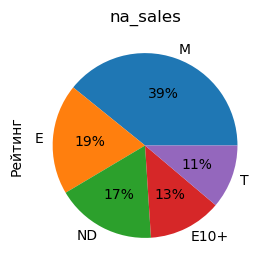

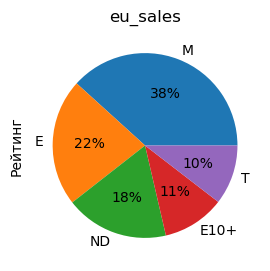

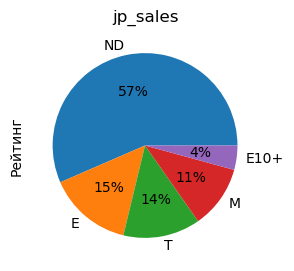

In [93]:
for region in regions_sales:
    (data_actual.pivot_table(index='rating', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(3, 3), legend=False, title = region)
                .set(ylabel='Рейтинг'))
plt.show()

По полученным круговым диаграммам видно:
- в Америке и Европе чаще покупаются игры с рейтингом М (Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков) и Е (Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика)
- а вот в Японии много продаж с неизвестным рейтином.

**Вывод**

В целом потреты пользователей Америки и Европы схожи, оба региона предпочтитают современные платформы PS4, PS3, X360, жанры Shooter и Action с соответствующими рейттингами М и Е.
А вот в Японии несколько другая картина. Наибольшей популярностью пользуется платформа 3DS местного производства компании Nintendo, в качестве любимых жанров преобладаюь Role-Playing и Action. С предпочитаемым рейтингом определиться не удалось, так как в данных рейтинга присутствуют только ESRB райтинг, распространяющийся для маркировки игр для США и Канады, а на Японию этот рейтинг не распространяется, от того и много пропусков столбце с рейтингом

#### Шаг 5. Проверка гипотез

##### Гипотезы о платформах

Сформулируем нулевую и альтернативную гипотезы

Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [94]:
xone = data_actual[(data_actual['platform'] == 'XOne') & (data_actual['user_score'].notna())]['user_score']

In [95]:
pc = data_actual[(data_actual['platform'] == 'PC') & (data_actual['user_score'].notna())]['user_score']

In [96]:
print("Дисперсия выборки xone", np.var(xone))
print("Дисперсия выборки pc", np.var(pc))

Дисперсия выборки xone 1.8965188383045533
Дисперсия выборки pc 2.7569952398906565


In [97]:
alpha = 0.05

results = st.ttest_ind(xone, pc, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [98]:
print('Средний пользовательский рейтинг платформы Xbox One:', xone.mean())
print('Средний пользовательский рейтинг платформы PC:', pc.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC: 6.4286407766990274


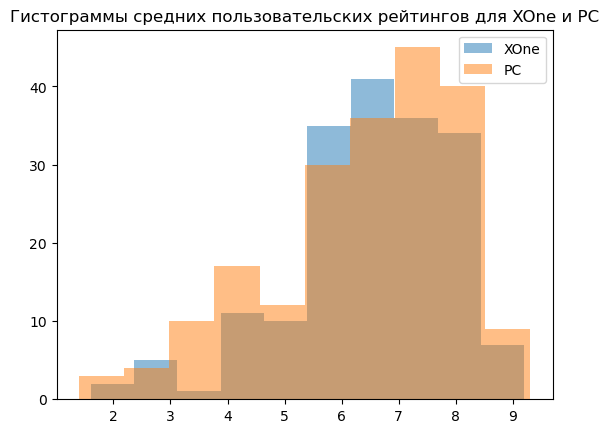

In [99]:
plt.hist(xone, bins=10,  alpha = 0.5, label='XOne');
plt.hist(pc, bins=10,  alpha = 0.5, label='PC');
plt.title('Гистограммы средних пользовательских рейтингов для XOne и PC')
plt.legend();

Вывод: p-уровень составил почти 55%, что гораздо больше установленного порогового значения в 5%. Поэтому отвергатать нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые нельзя. Это так же можно заметить по полученной гистограмме, что довольно много значений совпадает, а также по вычислениям средних значений, которые для обеих платформ отличаются незначительно.

##### Гипотезы о пользовательских рейтингах жанров

Сформулируем нулевую и альтернативную гипотезы

Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Н1: Средние пользовательские рейтинги жанров Action и Sports различаются

In [100]:
action = data_actual[(data_actual['genre'] == 'Action') & (data_actual['user_score'].notna())]['user_score']

In [101]:
sports = data_actual[(data_actual['genre'] == 'Sports') & (data_actual['user_score'].notna())]['user_score']

In [102]:
print("Дисперсия выборки action",np.var(action))
print("Дисперсия выборки sports",np.var(sports))

Дисперсия выборки action 1.8854720340439228
Дисперсия выборки sports 3.0228802210649377


In [103]:
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


In [104]:
print('Средний пользовательский рейтинг жанра Action:', action.mean())
print('Средний пользовательский рейтинг жанра Sports:', sports.mean())

Средний пользовательский рейтинг жанра Action: 6.825047801147227
Средний пользовательский рейтинг жанра Sports: 5.455670103092784


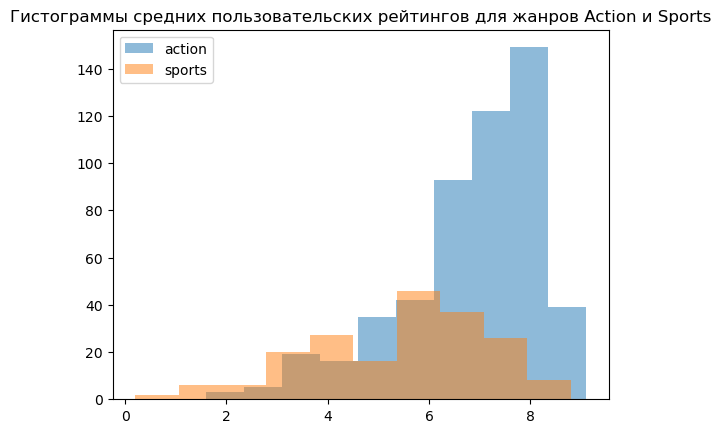

In [105]:
plt.hist(action, bins=10,  alpha = 0.5, label='action');
plt.hist(sports, bins=10,  alpha = 0.5, label='sports');
plt.title('Гистограммы средних пользовательских рейтингов для жанров Action и Sports')
plt.legend();

Вывод: p-уровень получился очень маленьким, гораздо  меньше установленного порогового в 5%, поэтому гипотезу о том, средние пользовательские рейтинги для жанров Action и Sports одинаковые отвергаем. Это же подтверждается приличной разницей средних значений (6.8 и 5.4), а также видно на представленной диаграмме.

##### Выводы по формулировке гипотез

Так как и в первой и второй задаче стоит вопрос о равенстве или неравенстве показателей, то формулировали двусторонние гипотезы, не дающие информации о том, больше или меньше значение, а просто показывающие равенство или различие средних показателей рассматриваемых совокупностей.

Для подтверждения или опровержения сформулированных гипотез применялся t-тест, так как:
- рассматриваемые совокупности не зависят друг от друга (в первой задаче расматривались разные платформы, во второй разные жанры, а не одна и таже ген.совокопность до и после какого-то воздействия);
- его довольно легко применить, если значения в рассматриваемой выборке достаточно велики, потому что в таком случае они будут распределены близко к нормальному;
- при применении t-теста дисперсии должны быть равны, однако при применении метода scipy.stats.ttest_ind допустимо установление неравенства дисперсий опять же по причине довольно большого размера выборки.

#### Шаг 6. Общий вывод

На входе были получены исторические данные о продажах игр из открытых источников. Необходимо было выявить определяющие успешность игры закономерности.

В соответствии с полученным запросом, задача решалась в четыре этапа:
1. Предобработка данных
2. Исследовательский анализ данных
3. Составление портерта пользователя каждого региона
4. Статистический анализ данных на основе гипотез

На **1 этапе "Предаброботка данных"** были выгружены данные, проанализированы на наличие пропусков и там где это логически возможно заполнены значениями. Определены дубликаты и удалены из датафрейма. Также типы данных приведены к соответствующим.

На **2 этапе "Исследовательский анализ данных"** были определены:
- период, за который лучше всего оценивать данные и делать прогнозы;
- перспективные платформы;
- влияние оценок критиков и пользовталей на глобальные продажи;
- популярные жанры.

На **3 этапе "Составление портрета пользователя** были определены:
- топ-5 платформ в Америке, Европе, Японии;
- топ-5 жанров в Америке, Европе, Японии;
- топ-5 игр в соответсвии с рейтингом ESRB в Америке, Европе, Японии

На **4 этапе "Статистический анализ данных на основе гипотез"** были сформулированы две пары нулвеой-альтернативной гипотезы:
- Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Н1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

и

- Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

- Н1: Средние пользовательские рейтинги жанров Action и Sports различаются


По результатам провденной работы можно сформулировать следующие выводы:

- С 2010 года наблюдается спад продаж в игровой индустрии;
- Платформы появляются и исчезают примерно в течение 10 лет;
- Наиболее популярные и перспективные на данный момент платформы – это Sony PlayStation 4 и Xbox One;
- В среднем одна игра, выпущенная на платформе приносит прибыль около 300 тысяч долларов, но очень популряне игры, которые находятся в топе продаж на всех представленных платформах и суммарная прибыль приближается к 100 млн;
- Оценки пользователей не оказывают практически никакого влияния на продаваемость игр, а вот высокие рейтинги от критиков чаще всего приводят к увеличению продаж, так что именно на оценки критиков стоит обратить внимание;
- В Америке и Европе лучше всего продаются игры в жанрах Action и Shooter;
- Больше всего продаж приходится на игры с рейтингом М (Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков)и Е(Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика);
- Япония – отдельный рынок с уклоном в портативные консоли и ролевые игры. Объём продаж в этой стране в 2.5 раза меньше суммарных показталей Европы и Америки.

Таким образом, потенциально выгодно разработать игру для рынка Европы и Америки на перспективных платформах Sony PlayStation 4 и Xbox One в жанре Shooter/Action. Японский рынок имеет свою специфику по платформам и жанрам, кроме того не слишком обширен. Продаваемость игры будет выше, если удостоится оценки критиков выше 80.